In [41]:
import os
import pickle
import numpy as np

file = "/home/gdapoian/Ambizione/01_Confidential_Data/CardioSleep/ecg_acc_and_scoring_v2.pickle"
with open(file, "rb") as f:
        # load the data from the pickle file using pickle.load()
        data = pickle.load(f)

In [42]:
import pandas as pd
### About the partecipants
print("The dataset includes data from: " + str(len(data["uid"].unique())) + " partecipants")
print("Total nights: " + str(len(data["night"].unique())))

print("The dataset includes data from: " + str(data["uid"].unique()))

df = pd.DataFrame(data)
df = df.replace("S011", "D011")
df = df.replace("S015", "D015")


The dataset includes data from: 12 partecipants
Total nights: 81
The dataset includes data from: ['S011' 'B005' 'S009' 'B006' 'B007' 'B004' 'S008' 'S001' 'S002' 'S003'
 'S015' 'S010']


/home/gdapoian/.local/lib/python3.10/site-packages/pandas/core/missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


In [50]:
df.shape

(73472, 8)

In [58]:
90*35*2


6300

<AxesSubplot:xlabel='Count', ylabel='night'>

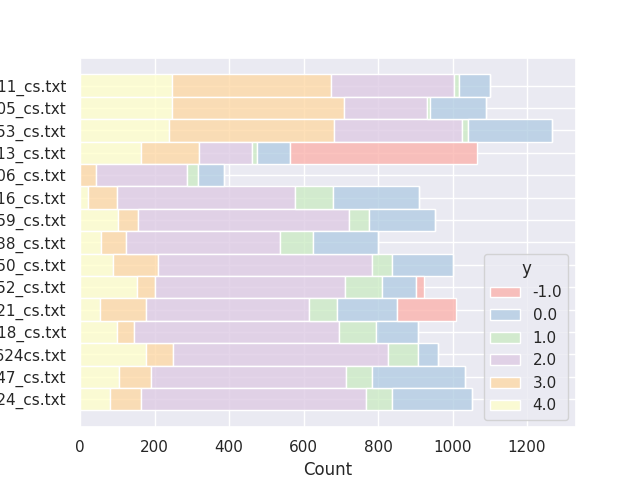

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib widget
sns.set_theme()

sns.histplot(data=df[df.uid.str.contains("D")], y ="night", hue="y", palette="Pastel1", alpha=0.8, multiple="stack")


<AxesSubplot:xlabel='Count', ylabel='night'>

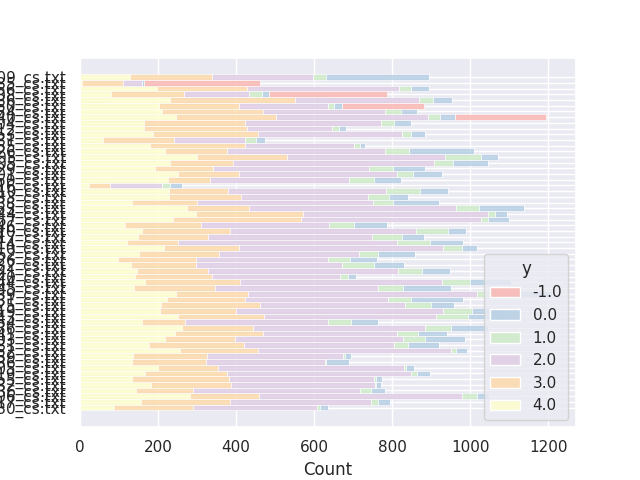

In [44]:
%matplotlib widget

sns.histplot(data=df[df.uid.str.contains("S")], y ="night", hue="y", palette="Pastel1", alpha=0.8, multiple="stack")


### Clean the dataset, i.e., remove all epochs for which the scoring label is -1 due to noisy EEG

In [45]:
index_to_keep = np.where(data["y"]!=-1)

In [46]:
clean_data = data.copy()
clean_data["y"] = clean_data["y"][index_to_keep[0]]
clean_data["x"] = clean_data["x"][index_to_keep[0]]
clean_data["acc_x"] = clean_data["acc_x"][index_to_keep[0]]
clean_data["acc_y"] = clean_data["acc_y"][index_to_keep[0]]
clean_data["acc_z"] = clean_data["acc_z"][index_to_keep[0]]
clean_data["uid"] = clean_data["uid"][index_to_keep[0]]
clean_data["nigh"] = clean_data["night"][index_to_keep[0]]

In [59]:
df = pd.DataFrame(clean_data)
df.loc[df.uid=="S002", "night"].unique()

array(['20211122_222346_cs.txt', '20211206_222510_cs.txt',
       '20211121_005217_cs.txt', '20211119_222514_cs.txt',
       '20211204_215610_cs.txt', '20211121_224852_cs.txt',
       '20211123_223726_cs.txt', '20211118_225432_cs.txt',
       '20211207_221241_cs.txt', '20211203_233240_cs.txt'], dtype=object)

In [48]:
a = df.loc[np.logical_and(data["uid"]=="S010", data["night"]=="20220224_232536_cs.txt"), "y"]

In [49]:
a[a==0].count()

61

In [11]:
pickle.dump(clean_data, open(os.path.join("/home/gdapoian/Ambizione/01_Confidential_Data/CardioSleep/","ecg_acc_and_scoring_clean.pickle"), "wb"))